In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\Research\\Models'

In [5]:
pd.set_option("display.max_columns", None)

# Data Loading

In [6]:
data_initial=pd.read_csv("D:/Datasets/m5-forecasting-accuracy/Obtained_Data/first_scenario.csv",dtype={"event_name_1": object,
                                                                                         "event_type_1": object,
                                                                                         "event_name_2": object,
                                                                                         "event_type_2": object,},index_col=0)

In [7]:
data_initial["date"]=pd.to_datetime(data_initial["date"])

In [8]:
data_initial.head()

Sales       date event_name_1 event_type_1 event_name_2 event_type_2  \
0      0 2011-01-29          NaN          NaN          NaN          NaN   
1      1 2011-01-30          NaN          NaN          NaN          NaN   
2      0 2011-01-31          NaN          NaN          NaN          NaN   
3      1 2011-02-01          NaN          NaN          NaN          NaN   
4      0 2011-02-02          NaN          NaN          NaN          NaN   

   snap_CA  snap_TX  snap_WI  sell_price   CA   TX   WI  Friday  Monday  \
0        0        0        0        2.47  0.0  1.0  0.0     0.0     0.0   
1        0        0        0        2.47  0.0  1.0  0.0     0.0     0.0   
2        0        0        0        2.47  0.0  1.0  0.0     0.0     1.0   
3        1        1        0        2.47  0.0  1.0  0.0     0.0     0.0   
4        1        0        1        2.47  0.0  1.0  0.0     0.0     0.0   

   Saturday  Sunday  Thursday  Tuesday  Wednesday  Jan  Feb  Mar  Apr  May  \
0       1.0     0.0       0.0      0.0        0.0  1.0  0.0  0.0  0.0  0.0   
1       0.0     1.0       0.0      0.0        0.0  1.0  0.0  0.0  0.0  0.0   
2       0.0     0.0       0.0      0.0        0.0  1.0  0.0  0.0  0.0  0.0   
3       0.0     0.0       0.0      1.0        0.0  0.0  1.0  0.0  0.0  0.0   
4       0.0     0.0       0.0      0.0        1.0  0.0  1.0  0.0  0.0  0.0   

   June  July  Agu  Sep  Oct  Nov  Dec  _2011  _2012  _2013  _2014  _2015  \
0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   
1   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   
2   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   
3   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   
4   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   

   _2016  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

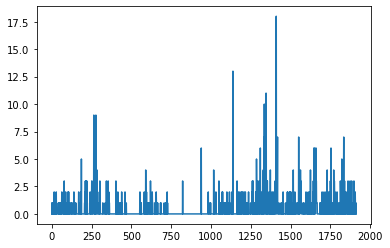

In [9]:
plt.plot(data_initial.Sales)

## Event Conversion

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
hot_encoder=OneHotEncoder()

In [12]:
data_initial.drop(["event_name_1", "event_name_2", "event_type_2", "CA", "TX", "WI"], axis=1, inplace=True)

In [13]:
data_initial[data_initial["event_type_1"].isna()]["event_type_1"]=0
data_initial["event_type_1"]=data_initial["event_type_1"].astype(str)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
encoded_event=hot_encoder.fit_transform(data_initial[["event_type_1"]])
array_event=encoded_event.toarray()

In [15]:
hot_encoder.categories_

[array(['Cultural', 'National', 'Religious', 'Sporting', 'nan'],
       dtype=object)]

In [16]:
event_df=pd.DataFrame(array_event,columns=["Cultural", "National", "Religious", "Sporting", 'nan'])

In [17]:
frames=[data_initial, event_df]
data=pd.concat(frames, axis=1)

In [18]:
data.drop(["event_type_1", "nan"], axis=1, inplace=True)

In [19]:
data.head()

Sales       date  snap_CA  snap_TX  snap_WI  sell_price  Friday  Monday  \
0      0 2011-01-29        0        0        0        2.47     0.0     0.0   
1      1 2011-01-30        0        0        0        2.47     0.0     0.0   
2      0 2011-01-31        0        0        0        2.47     0.0     1.0   
3      1 2011-02-01        1        1        0        2.47     0.0     0.0   
4      0 2011-02-02        1        0        1        2.47     0.0     0.0   

   Saturday  Sunday  Thursday  Tuesday  Wednesday  Jan  Feb  Mar  Apr  May  \
0       1.0     0.0       0.0      0.0        0.0  1.0  0.0  0.0  0.0  0.0   
1       0.0     1.0       0.0      0.0        0.0  1.0  0.0  0.0  0.0  0.0   
2       0.0     0.0       0.0      0.0        0.0  1.0  0.0  0.0  0.0  0.0   
3       0.0     0.0       0.0      1.0        0.0  0.0  1.0  0.0  0.0  0.0   
4       0.0     0.0       0.0      0.0        1.0  0.0  1.0  0.0  0.0  0.0   

   June  July  Agu  Sep  Oct  Nov  Dec  _2011  _2012  _2013  _2014  _2015  \
0   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   
1   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   
2   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   
3   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   
4   0.0   0.0  0.0  0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0   

   _2016  Cultural  National  Religious  Sporting  
0    0.0       0.0       0.0        0.0       0.0  
1    0.0       0.0       0.0        0.0       0.0  
2    0.0       0.0       0.0        0.0       0.0  
3    0.0       0.0       0.0        0.0       0.0  
4    0.0       0.0       0.0        0.0       0.0

In [20]:
data.describe()

Sales      snap_CA      snap_TX      snap_WI    sell_price  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1.913000e+03   
mean      0.457919     0.329326     0.329326     0.329326  2.470000e+00   
std       1.169894     0.470091     0.470091     0.470091  4.442053e-16   
min       0.000000     0.000000     0.000000     0.000000  2.470000e+00   
25%       0.000000     0.000000     0.000000     0.000000  2.470000e+00   
50%       0.000000     0.000000     0.000000     0.000000  2.470000e+00   
75%       0.000000     1.000000     1.000000     1.000000  2.470000e+00   
max      18.000000     1.000000     1.000000     1.000000  2.470000e+00   

            Friday       Monday     Saturday       Sunday     Thursday  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000   
mean      0.142708     0.142708     0.143231     0.143231     0.142708   
std       0.349866     0.349866     0.350399     0.350399     0.349866   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Tuesday    Wednesday          Jan          Feb          Mar  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000   
mean      0.142708     0.142708     0.082593     0.088866     0.097229   
std       0.349866     0.349866     0.275338     0.284624     0.296347   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               Apr          May         June         July          Agu  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000   
mean      0.090957     0.081025     0.078411     0.081025     0.081025   
std       0.287623     0.272944     0.268887     0.272944     0.272944   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               Sep          Oct          Nov          Dec        _2011  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000   
mean      0.078411     0.081025     0.078411     0.081025     0.176163   
std       0.268887     0.272944     0.268887     0.272944     0.381058   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             _2012        _2013        _2014        _2015        _2016  \
count  1913.000000  1913.000000  1913.000000  1913.000000  1913.000000   
mean      0.191323     0.190800     0.190800     0.190800     0.060115   
std       0.393445     0.393034     0.393034     0.393034     0.237762   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

  

# Performance Function

In [21]:
def performance_list(ID,actual,forecast):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

### Train & Test

In [22]:
# train=data[data["date"]<((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]

In [23]:
# test=data[data["date"]>=((data["date"].max()-data["date"].min())*0.8)+data["date"].min()]
# test.reset_index(drop=True, inplace=True)

In [24]:
train=data[:-28]

In [26]:
test=data[-28:]
test.reset_index(drop=True, inplace=True)

### Date and Customer Drop

In [27]:
train=train.drop(["date"], axis=1)
test=test.drop(["date"], axis=1)

In [28]:
X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]

# Linear Regression-Elastic Net

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
from sklearn.linear_model import ElasticNet

### Grid

In [31]:
elastic_net_model = ElasticNet()

In [32]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [33]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [34]:
elastic_net.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [35]:
elastic_predictions=elastic_net.predict(X_test)

In [36]:
performance_list("Control", elastic_net.predict(X_train), y_train)

Name  # of inst      Mean  Standard Dev.         FBias       MPE  \
0  Control       1885  0.457294       0.120291  4.399677e-16  0.102423   

       MAPE      RMSE       MAD     WMAPE  
0  1.408452  0.026508  0.663189  1.450246

In [37]:
res_elastic=performance_list("Elastic Net Performance", elastic_predictions, y_test)

In [38]:
res_elastic

Name  # of inst      Mean  Standard Dev.     FBias  \
0  Elastic Net Performance         28  0.484167       0.018109 -0.032701   

        MPE      MAPE      RMSE       MAD     WMAPE  
0 -0.035892  1.321606  0.147442  0.636951  1.315559

# Support Vector Machines

### Grid

In [39]:
elastic_net_model = ElasticNet()

In [40]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [41]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

### Linear

In [42]:
from sklearn.svm import LinearSVR

In [43]:
sv_regressor=LinearSVR()

### Grid

In [44]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [45]:
sv_regressor = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [46]:
sv_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

### Poly with Kernel

In [47]:
from sklearn.svm import SVR

### Grid

In [48]:
param_grid_svm_poly=[
    {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [49]:
sv_regressor_poly=SVR(kernel="poly")

In [50]:
sv_regressor_poly = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [51]:
sv_regressor_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [52]:
sv_regressor_poly.best_estimator_

SVR(degree=2, epsilon=0.2, kernel='poly')

### Predictions

In [53]:
svm_predictions_linear=sv_regressor.predict(X_test)

In [54]:
res_svr_linear=performance_list("Support Vector Regressor Linear Performance", svm_predictions_linear, y_test)

In [55]:
svm_predictions_poly=sv_regressor_poly.predict(X_test)

In [56]:
res_svr_poly=performance_list("Support Vector Regressor Polynomial Performance", svm_predictions_poly, y_test)

In [57]:
performance_list("Control", sv_regressor.predict(X_train), y_train)

Name  # of inst      Mean  Standard Dev.     FBias       MPE      MAPE  \
0  Control       1885  0.500003       0.000006  0.085416  0.085419  1.425456   

       RMSE       MAD     WMAPE  
0  0.027067  0.712733  1.425458

In [58]:
performance_list("Control", sv_regressor_poly.predict(X_train), y_train)

Name  # of inst      Mean  Standard Dev.     FBias       MPE      MAPE  \
0  Control       1885  0.201973       0.110933 -1.264137 -0.761032  2.271907   

       RMSE       MAD     WMAPE  
0  0.026881  0.523687  2.592855

### Results

In [59]:
res_svr_linear

Name  # of inst      Mean  \
0  Support Vector Regressor Linear Performance         28  0.500003   

   Standard Dev.     FBias       MPE      MAPE      RMSE       MAD     WMAPE  
0       0.000002  0.000006  0.000005  1.285709  0.147254  0.642858  1.285708

In [60]:
res_svr_poly

Name  # of inst      Mean  \
0  Support Vector Regressor Polynomial Performance         28  0.235093   

   Standard Dev.     FBias    MPE      MAPE      RMSE       MAD     WMAPE  
0       0.034439 -1.126815 -1.126  2.411715  0.155289  0.565191  2.404113

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

### Grid

In [62]:
param_grid=[
    {"n_estimators":[200,300,500], "max_features":[8,12,16],
     "bootstrap":[False,True]}
]

In [63]:
random_reg=RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_reg, param_grid=param_grid,
                 cv=10,return_train_score=True)

### Predictions

In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True],
                          'max_features': [8, 12, 16],
                          'n_estimators': [200, 300, 500]}],
             return_train_score=True)

In [65]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 500}

### Results

In [66]:
rf_predictions=grid_search.predict(X_test)

In [67]:
res_rf=performance_list("Random Forest Performance", rf_predictions, y_test)

In [68]:
res_rf

Name  # of inst      Mean  Standard Dev.     FBias  \
0  Random Forest Performance         28  0.680728       0.347571  0.265492   

        MPE      MAPE      RMSE       MAD     WMAPE  
0  0.213311  1.106911  0.150058  0.662951  0.973885

In [69]:
performance_list("Control", grid_search.predict(X_train), y_train)

Name  # of inst      Mean  Standard Dev.     FBias  MPE  MAPE      RMSE  \
0  Control       1885  0.459614       0.800919  0.005046  NaN   NaN  0.013787   

        MAD     WMAPE  
0  0.299616  0.651886

# Feature Extraction

In [70]:
from sklearn.tree import DecisionTreeRegressor

### Train Node Selection

In [71]:
estimator = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [72]:
on_leaf = estimator.apply(X_train)

In [73]:
X_train_ext=X_train[:]

In [74]:
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
X_train_ext

snap_CA  snap_TX  snap_WI  sell_price  Friday  Monday  Saturday  Sunday  \
0           0        0        0        2.47     0.0     0.0       1.0     0.0   
1           0        0        0        2.47     0.0     0.0       0.0     1.0   
2           0        0        0        2.47     0.0     1.0       0.0     0.0   
3           1        1        0        2.47     0.0     0.0       0.0     0.0   
4           1        0        1        2.47     0.0     0.0       0.0     0.0   
...       ...      ...      ...         ...     ...     ...       ...     ...   
1880        0        0        0        2.47     0.0     0.0       0.0     0.0   
1881        0        0        0        2.47     0.0     0.0       0.0     0.0   
1882        0        0        0        2.47     1.0     0.0       0.0     0.0   
1883        0        0        0        2.47     0.0     0.0       1.0     0.0   
1884        0        0        0        2.47     0.0     0.0       0.0     1.0   

      Thursday  Tuesday  Wednesday  Jan  Feb  Mar  Apr  May  June  July  Agu  \
0          0.0      0.0        0.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   
1          0.0      0.0        0.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   
2          0.0      0.0        0.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0  0.0   
3          0.0      1.0        0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0  0.0   
4          0.0      0.0        1.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0  0.0   
...        ...      ...        ...  ...  ...  ...  ...  ...   ...   ...  ...   
1880       0.0      0.0        1.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0   
1881       1.0      0.0        0.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0   
1882       0.0      0.0        0.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0   
1883       0.0      0.0        0.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0   
1884       0.0      0.0        0.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0   

      Sep  Oct  Nov  Dec  _2011  _2012  _2013  _2014  _2015  _2016  Cultural  \
0     0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0    0.0       0.0   
1     0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0    0.0       0.0   
2     0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0    0.0       0.0   
3     0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0    0.0       0.0   
4     0.0  0.0  0.0  0.0    1.0    0.0    0.0    0.0    0.0    0.0       0.0   
...   ...  ...  ...  ...    ...    ...    ...    ...    ...    ...       ...   
1880  0.0  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    1.0       0.0   
1881  0.0  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    1.0       0.0   
1882  0.0  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    1.0       0.0   
1883  0.0  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    1.0       0.0   
1884  0.0  0.0  0.0  0.0    0.0    0.0    0.0    0.0    0.0    1.0       1.0   

      National  Religious  Sporting  Node  
0          0.0        0.0       0.0     5  
1          0.0        0.0       0.0     5  
2          0.0        0.0       0.0     5  
3          0.0        0.0       0.0     5  
4          0.0        0.0       0.0     5  
...        ...        ...       ...   ...  
1880       0.0        0.0       0.0     5  
1881       0.0        1.0       0.0     5  
1882       0.0        0.0       0.0     5  
1883       0.0        0.0       0.0     5  
1884       0.0        0.0       0.0     5  

[1885 rows x 34 columns]

### Test Node Selection

In [76]:
on_leaf_test = estimator.apply(X_test)

In [77]:
X_test_ext=X_test[:]

In [78]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
X_test_ext

snap_CA  snap_TX  snap_WI  sell_price  Friday  Monday  Saturday  Sunday  \
0         0        0        0        2.47     0.0     1.0       0.0     0.0   
1         0        0        0        2.47     0.0     0.0       0.0     0.0   
2         0        0        0        2.47     0.0     0.0       0.0     0.0   
3         0        0        0        2.47     0.0     0.0       0.0     0.0   
4         1        1        0        2.47     1.0     0.0       0.0     0.0   
5         1        0        1        2.47     0.0     0.0       1.0     0.0   
6         1        1        1        2.47     0.0     0.0       0.0     1.0   
7         1        0        0        2.47     0.0     1.0       0.0     0.0   
8         1        1        1        2.47     0.0     0.0       0.0     0.0   
9         1        1        1        2.47     0.0     0.0       0.0     0.0   
10        1        1        0        2.47     0.0     0.0       0.0     0.0   
11        1        0        1        2.47     1.0     0.0       0.0     0.0   
12        1        1        1        2.47     0.0     0.0       1.0     0.0   
13        1        0        0        2.47     0.0     0.0       0.0     1.0   
14        0        1        1        2.47     0.0     1.0       0.0     0.0   
15        0        1        1        2.47     0.0     0.0       0.0     0.0   
16        0        1        0        2.47     0.0     0.0       0.0     0.0   
17        0        0        1        2.47     0.0     0.0       0.0     0.0   
18        0        1        1        2.47     1.0     0.0       0.0     0.0   
19        0        0        0        2.47     0.0     0.0       1.0     0.0   
20        0        0        0        2.47     0.0     0.0       0.0     1.0   
21        0        0        0        2.47     0.0     1.0       0.0     0.0   
22        0        0        0        2.47     0.0     0.0       0.0     0.0   
23        0        0        0        2.47     0.0     0.0       0.0     0.0   
24        0        0        0        2.47     0.0     0.0       0.0     0.0   
25        0        0        0        2.47     1.0     0.0       0.0     0.0   
26        0        0        0        2.47     0.0     0.0       1.0     0.0   
27        0        0        0        2.47     0.0     0.0       0.0     1.0   

    Thursday  Tuesday  Wednesday  Jan  Feb  Mar  Apr  May  June  July  Agu  \
0        0.0      0.0        0.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0   
1        0.0      1.0        0.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0   
2        0.0      0.0        1.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0   
3        1.0      0.0        0.0  0.0  0.0  1.0  0.0  0.0   0.0   0.0  0.0   
4        0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
5        0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
6        0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
7        0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
8        0.0      1.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
9        0.0      0.0        1.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
10       1.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
11       0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
12       0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
13       0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
14       0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
15       0.0      1.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
16       0.0      0.0        1.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
17       1.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
18       0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
19       0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0   
20       0.0      0.0        0.0  0.0  0.0  0.0  1.0  0.0   0.0   0.0  0.0

### Feature Adding

Ma=1 kullanıldı daha hızlı bir şekilde anlaşılması için

In [80]:
Xframes_feature=[X_train_ext, X_test_ext]
yframes_feature=[y_train, y_test]
X_concat=pd.concat(Xframes_feature)
Y_concat=pd.concat(yframes_feature)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [81]:
concated_df["new_feature"] = concated_df.groupby(["Node"])["Sales"].shift(+1)

In [82]:
X_test_new=concated_df.iloc[len(X_train):].drop(["Sales","Node"], axis=1)

y_test_new=concated_df.iloc[len(X_train):]["Sales"]

In [83]:
train_new=concated_df.iloc[:len(X_train)]

In [84]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
X_train_new=train_new.drop(["Sales","Node"], axis=1)

y_train_new=train_new["Sales"]

## Short Prediction Quality

# Linear Regression-Elastic Net

### Grid

In [86]:
elastic_net_model_new = ElasticNet()

In [87]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [88]:
elastic_net_new = GridSearchCV(estimator=elastic_net_model_new, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [89]:
elastic_net_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [90]:
elastic_predictions_new=elastic_net_new.predict(X_test_new)

In [91]:
res_elastic_new=performance_list("Elastic Net Performance with Feature Extraction", elastic_predictions_new, y_test_new)

In [92]:
res_elastic_new

Name  # of inst      Mean  \
0  Elastic Net Performance with Feature Extraction         28  0.508078   

   Standard Dev.     FBias       MPE      MAPE      RMSE       MAD     WMAPE  
0       0.184735  0.015899 -0.030048  1.315762  0.148912  0.645244  1.269971

### SVM

#### Linear

In [93]:
sv_regressor_new=LinearSVR()

### Grid

In [94]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [95]:
sv_regressor_new = GridSearchCV(estimator=sv_regressor_new, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True,)

In [96]:
sv_regressor_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

In [97]:
svm_predictions_new=sv_regressor_new.predict(X_test_new)

res_svr_new=performance_list("SVR Linear Performance with Feature Extraction", 
                                svm_predictions_new, y_test_new)

res_svr_new

Name  # of inst      Mean  \
0  SVR Linear Performance with Feature Extraction         28  0.500001   

   Standard Dev.     FBias       MPE      MAPE      RMSE       MAD     WMAPE  
0   5.931880e-07  0.000003  0.000003  1.285711  0.147254  0.642858  1.285711

## Poly

### Grid

In [98]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [99]:
sv_regressor_poly_new=SVR(kernel="poly")

In [100]:
sv_regressor_poly_new = GridSearchCV(estimator=sv_regressor_poly_new, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [101]:
sv_regressor_poly_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [102]:
sv_regressor_poly_new.best_estimator_

SVR(degree=2, epsilon=0.2, kernel='poly')

In [103]:
svm_predictions_poly_new=sv_regressor_poly_new.predict(X_test_new)

res_svr_poly_new=performance_list("SVR Polynomail Performance with Feature Extraction", 
                                svm_predictions_poly_new, y_test_new)

res_svr_poly_new

Name  # of inst      Mean  \
0  SVR Polynomail Performance with Feature Extrac...         28  0.239656   

   Standard Dev.     FBias       MPE      MAPE      RMSE       MAD     WMAPE  
0       0.053535 -1.086327 -1.106539  2.392254  0.154296  0.565238  2.358543

### Random Forest

In [104]:
random_reg_new=RandomForestRegressor()
grid_search_new = GridSearchCV(estimator=random_reg_new, param_grid=param_grid,
                 cv=10,return_train_score=True)

In [105]:
grid_search_new.fit(X_train_new, y_train_new)

grid_search_new.best_params_

{'bootstrap': True, 'max_features': 8, 'n_estimators': 300}

In [106]:
rf_predictions_new=grid_search_new.predict(X_test_new)

res_rf_new=performance_list("Random Forest Performance with Feature Extraction", rf_predictions_new, y_test_new)

res_rf_new

Name  # of inst     Mean  \
0  Random Forest Performance with Feature Extraction         28  0.66557   

   Standard Dev.     FBias      MPE      MAPE      RMSE       MAD     WMAPE  
0       0.314869  0.248764  0.19655  1.089164  0.155677  0.718603  1.079681

# General Result Table

In [107]:
pd.options.display.float_format = '{:,.8f}'.format

In [108]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [109]:
total_result

Name  # of inst       Mean  \
0                            Elastic Net Performance         28 0.48416726   
1        Support Vector Regressor Linear Performance         28 0.50000324   
2    Support Vector Regressor Polynomial Performance         28 0.23509328   
3                          Random Forest Performance         28 0.68072823   
4    Elastic Net Performance with Feature Extraction         28 0.50807780   
5     SVR Linear Performance with Feature Extraction         28 0.50000149   
6  SVR Polynomail Performance with Feature Extrac...         28 0.23965566   
7  Random Forest Performance with Feature Extraction         28 0.66556996   

   Standard Dev.       FBias         MPE       MAPE       RMSE        MAD  \
0     0.01810921 -0.03270097 -0.03589212 1.32160641 0.14744230 0.63695075   
1     0.00000218  0.00000649  0.00000536 1.28570893 0.14725384 0.64285803   
2     0.03443945 -1.12681532 -1.12600035 2.41171464 0.15528861 0.56519087   
3     0.34757099  0.26549249  0.21331115 1.10691143 0.15005754 0.66295085   
4     0.18473472  0.01589875 -0.03004804 1.31576233 0.14891226 0.64524417   
5     0.00000059  0.00000299  0.00000304 1.28571124 0.14725377 0.64285752   
6     0.05353461 -1.08632668 -1.10653943 2.39225371 0.15429573 0.56523829   
7     0.31486899  0.24876418  0.19655003 1.08916426 0.15567684 0.71860332   

       WMAPE  
0 1.31555931  
1 1.28570773  
2 2.40411321  
3 0.97388476  
4 1.26997118  
5 1.28571120  
6 2.35854345  
7 1.07968111

## RFOverfitting

In [110]:
rf_control=grid_search.predict(X_train)

performance_list("RF Performance without Feature Extraction",rf_control, y_train)

Name  # of inst       Mean  \
0  RF Performance without Feature Extraction       1885 0.45961366   

   Standard Dev.      FBias  MPE  MAPE       RMSE        MAD      WMAPE  
0     0.80091931 0.00504603  nan   nan 0.01378732 0.29961564 0.65188586

In [111]:
rf_control=grid_search.predict(X_test)

performance_list("RF Performance without Feature Extraction",rf_control, y_test)

Name  # of inst       Mean  \
0  RF Performance without Feature Extraction         28 0.68072823   

   Standard Dev.      FBias        MPE       MAPE       RMSE        MAD  \
0     0.34757099 0.26549249 0.21331115 1.10691143 0.15005754 0.66295085   

       WMAPE  
0 0.97388476

In [112]:
rf_control_feature=grid_search_new.predict(X_train_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_train_new)

Name  # of inst       Mean  \
0  RF Performance with Feature Extraction       1863 0.46799307   

   Standard Dev.      FBias  MPE  MAPE       RMSE        MAD      WMAPE  
0     0.82085129 0.01820348  nan   nan 0.01190253 0.26284899 0.56165145

In [113]:
rf_control_feature=grid_search_new.predict(X_test_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_test_new)

Name  # of inst       Mean  \
0  RF Performance with Feature Extraction         28 0.66556996   

   Standard Dev.      FBias        MPE       MAPE       RMSE        MAD  \
0     0.31486899 0.24876418 0.19655003 1.08916426 0.15567684 0.71860332   

       WMAPE  
0 1.07968111

# Feature Control

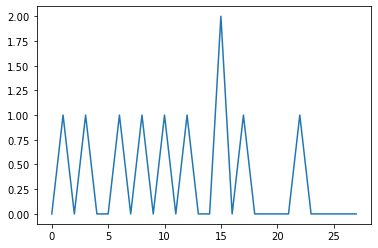

In [114]:
plt.plot(data.Sales[:28])

In [115]:
from statsmodels.graphics.tsaplots import plot_acf

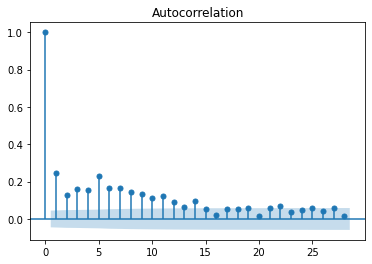

In [116]:
plot_acf(data.Sales, lags=28)
plt.show()

## Node Control

In [117]:
concated_df.Node.value_counts()

5     903
20    274
32    242
6      93
8      79
12     42
21     31
33     31
15     21
23     21
35     21
38     21
41     20
26     20
13     20
9      14
24     10
27     10
16     10
36     10
39     10
42     10
Name: Node, dtype: int64

In [118]:
concated_df[concated_df["Node"]==6].head()

snap_CA  snap_TX  snap_WI  sell_price     Friday     Monday   Saturday  \
306        1        1        0  2.47000000 0.00000000 0.00000000 0.00000000   
307        1        0        1  2.47000000 1.00000000 0.00000000 0.00000000   
308        1        1        1  2.47000000 0.00000000 0.00000000 1.00000000   
309        1        0        0  2.47000000 0.00000000 0.00000000 0.00000000   
310        1        1        1  2.47000000 0.00000000 1.00000000 0.00000000   

        Sunday   Thursday    Tuesday  Wednesday        Jan        Feb  \
306 0.00000000 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
307 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
308 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
309 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
310 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   

           Mar        Apr        May       June       July        Agu  \
306 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
307 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
308 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
309 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
310 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   

           Sep        Oct        Nov        Dec      _2011      _2012  \
306 0.00000000 0.00000000 0.00000000 1.00000000 1.00000000 0.00000000   
307 0.00000000 0.00000000 0.00000000 1.00000000 1.00000000 0.00000000   
308 0.00000000 0.00000000 0.00000000 1.00000000 1.00000000 0.00000000   
309 0.00000000 0.00000000 0.00000000 1.00000000 1.00000000 0.00000000   
310 0.00000000 0.00000000 0.00000000 1.00000000 1.00000000 0.00000000   

         _2013      _2014      _2015      _2016   Cultural   National  \
306 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
307 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
308 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
309 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
310 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   

     Religious   Sporting  Node  Sales  new_feature  
306 0.00000000 0.00000000     6      0          nan  
307 0.00000000 0.00000000     6      0   0.00000000  
308 0.00000000 0.00000000     6      0   0.00000000  
309 0.00000000 0.00000000     6      0   0.00000000  
310 0.00000000 0.00000000     6      0   0.00000000

In [119]:
concated_df[concated_df["Node"]==9].head()

snap_CA  snap_TX  snap_WI  sell_price     Friday     Monday   Saturday  \
190         1        1        0  2.47000000 0.00000000 0.00000000 0.00000000   
197         0        0        1  2.47000000 0.00000000 0.00000000 0.00000000   
204         0        0        0  2.47000000 0.00000000 0.00000000 0.00000000   
211         0        0        0  2.47000000 0.00000000 0.00000000 0.00000000   
1282        1        1        1  2.47000000 0.00000000 0.00000000 0.00000000   

         Sunday   Thursday    Tuesday  Wednesday        Jan        Feb  \
190  1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
197  1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
204  1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
211  1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1282 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   

            Mar        Apr        May       June       July        Agu  \
190  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 1.00000000   
197  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 1.00000000   
204  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 1.00000000   
211  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 1.00000000   
1282 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 1.00000000   

            Sep        Oct        Nov        Dec      _2011      _2012  \
190  0.00000000 0.00000000 0.00000000 0.00000000 1.00000000 0.00000000   
197  0.00000000 0.00000000 0.00000000 0.00000000 1.00000000 0.00000000   
204  0.00000000 0.00000000 0.00000000 0.00000000 1.00000000 0.00000000   
211  0.00000000 0.00000000 0.00000000 0.00000000 1.00000000 0.00000000   
1282 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   

          _2013      _2014      _2015      _2016   Cultural   National  \
190  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
197  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
204  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
211  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1282 0.00000000 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000   

      Religious   Sporting  Node  Sales  new_feature  
190  0.00000000 0.00000000     9      0          nan  
197  0.00000000 0.00000000     9      0   0.00000000  
204  0.00000000 0.00000000     9      0   0.00000000  
211  0.00000000 0.00000000     9      3   0.00000000  
1282 0.00000000 0.00000000     9      1   3.00000000

In [120]:
concated_df[concated_df["Node"]==42].head()

snap_CA  snap_TX  snap_WI  sell_price     Friday     Monday   Saturday  \
1008        1        0        1  2.47000000 0.00000000 0.00000000 1.00000000   
1009        1        1        1  2.47000000 0.00000000 0.00000000 0.00000000   
1011        1        1        1  2.47000000 0.00000000 0.00000000 0.00000000   
1012        1        1        1  2.47000000 0.00000000 0.00000000 0.00000000   
1014        1        0        1  2.47000000 1.00000000 0.00000000 0.00000000   

         Sunday   Thursday    Tuesday  Wednesday        Jan        Feb  \
1008 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1009 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1011 0.00000000 0.00000000 1.00000000 0.00000000 0.00000000 0.00000000   
1012 0.00000000 0.00000000 0.00000000 1.00000000 0.00000000 0.00000000   
1014 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   

            Mar        Apr        May       June       July        Agu  \
1008 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1009 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1011 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1012 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1014 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   

            Sep        Oct        Nov        Dec      _2011      _2012  \
1008 0.00000000 0.00000000 1.00000000 0.00000000 0.00000000 0.00000000   
1009 0.00000000 0.00000000 1.00000000 0.00000000 0.00000000 0.00000000   
1011 0.00000000 0.00000000 1.00000000 0.00000000 0.00000000 0.00000000   
1012 0.00000000 0.00000000 1.00000000 0.00000000 0.00000000 0.00000000   
1014 0.00000000 0.00000000 1.00000000 0.00000000 0.00000000 0.00000000   

          _2013      _2014      _2015      _2016   Cultural   National  \
1008 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1009 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1011 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1012 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   
1014 1.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000   

      Religious   Sporting  Node  Sales  new_feature  
1008 0.00000000 0.00000000    42      0          nan  
1009 0.00000000 0.00000000    42      0   0.00000000  
1011 0.00000000 0.00000000    42      0   0.00000000  
1012 0.00000000 0.00000000    42      0   0.00000000  
1014 0.00000000 0.00000000    42      0   0.00000000

# General Function

In [128]:
def result_obtain(df, feature_set, name, lag):

    df[name]=feature_set
    
#     train=df[df["date"]<((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
#     test=df[df["date"]>=((df["date"].max()-df["date"].min())*0.8)+df["date"].min()]
    train=df[:-28]

    test=df[-28:]

    test.reset_index(drop=True, inplace=True)

    ### Date and Customer Drop

    train=train.drop(["date"], axis=1)
    test=test.drop(["date"], axis=1)

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    train.dropna(inplace=True);
    train.reset_index(drop=True, inplace=True)
    train.index += lag

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    
    
    # Linear Regression-Elastic Net

    elastic_net_function = ElasticNet()

    param_grid_elastic=[
        {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
    ]

    elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
                     cv=10,return_train_score=True)
    
    elastic_net_function.fit(X_train, y_train)
    

    elastic_predictions=elastic_net_function.predict(X_test)

    res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
    # Support Vector Machines

    ### Linear

    sv_regressor=LinearSVR()
    

    ### Grid

    param_grid_svm_linear=[
        {"epsilon":[0.5,1,1.5]}
    ]

    sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                     cv=10,return_train_score=True)

    sv_regressor_function.fit(X_train, y_train)


    
    sv_regressor_poly=SVR(kernel="poly")
        
    ### Grid

    param_grid_svm_poly=[
        {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
    ]


    sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                     cv=10,return_train_score=True)

    sv_regressor_poly_function.fit(X_train, y_train)


    ### Predictions

    svm_predictions_linear=sv_regressor_function.predict(X_test)
    
    svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


    ### Results    

    res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

    res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
    # Random Forest
    
    ### Grid

    param_grid=[
        {"n_estimators":[200,300,500], "max_features":[8,12,16],
         "bootstrap":[False,True]}
    ]

    random_reg_function=RandomForestRegressor()
    grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
                     cv=10,return_train_score=True)

    ### Predictions

    grid_search.fit(X_train, y_train)

    ### Results

    rf_predictions=grid_search.predict(X_test)

    res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
    res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

    total_res=pd.concat(res_df)
    
    return total_res

In [129]:
res1=result_obtain(data.copy(), data["Sales"].shift(+1), "lag1", 1)

In [130]:
res1

Name  # of inst       Mean  Standard Dev.  \
0     Elastic Net Performance Lag 1         28 0.50773088     0.18510421   
0      SVR Linear Performance Lag 1         28 0.49999839     0.00000380   
0  SVR Polynomial Performance Lag 1         28 0.24428814     0.05440748   
0   Random Forest Performance Lag 1         28 0.63972789     0.26660245   

        FBias         MPE       MAPE       RMSE        MAD      WMAPE  
0  0.01522633 -0.03091389 1.31662818 0.14888334 0.64536452 1.27107597  
0 -0.00000321 -0.00000307 1.28571736 0.14725376 0.64285704 1.28571821  
0 -1.04676334 -1.03136733 2.31708162 0.15385970 0.56428297 2.30990741  
0  0.21841769  0.16818958 1.11752471 0.15746898 0.70630187 1.10406609

In [131]:
total_result

Name  # of inst       Mean  \
0                            Elastic Net Performance         28 0.48416726   
1        Support Vector Regressor Linear Performance         28 0.50000324   
2    Support Vector Regressor Polynomial Performance         28 0.23509328   
3                          Random Forest Performance         28 0.68072823   
4    Elastic Net Performance with Feature Extraction         28 0.50807780   
5     SVR Linear Performance with Feature Extraction         28 0.50000149   
6  SVR Polynomail Performance with Feature Extrac...         28 0.23965566   
7  Random Forest Performance with Feature Extraction         28 0.66556996   

   Standard Dev.       FBias         MPE       MAPE       RMSE        MAD  \
0     0.01810921 -0.03270097 -0.03589212 1.32160641 0.14744230 0.63695075   
1     0.00000218  0.00000649  0.00000536 1.28570893 0.14725384 0.64285803   
2     0.03443945 -1.12681532 -1.12600035 2.41171464 0.15528861 0.56519087   
3     0.34757099  0.26549249  0.21331115 1.10691143 0.15005754 0.66295085   
4     0.18473472  0.01589875 -0.03004804 1.31576233 0.14891226 0.64524417   
5     0.00000059  0.00000299  0.00000304 1.28571124 0.14725377 0.64285752   
6     0.05353461 -1.08632668 -1.10653943 2.39225371 0.15429573 0.56523829   
7     0.31486899  0.24876418  0.19655003 1.08916426 0.15567684 0.71860332   

       WMAPE  
0 1.31555931  
1 1.28570773  
2 2.40411321  
3 0.97388476  
4 1.26997118  
5 1.28571120  
6 2.35854345  
7 1.07968111